In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_column", None)

## HR Dataset

In [2]:
hr_df = pd.read_csv("HRDataset_v13.csv")

In [3]:
hr_df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [4]:
hr_df.shape

(401, 35)

In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               310 non-null    object 
 1   EmpID                       310 non-null    float64
 2   MarriedID                   310 non-null    float64
 3   MaritalStatusID             310 non-null    float64
 4   GenderID                    310 non-null    float64
 5   EmpStatusID                 310 non-null    float64
 6   DeptID                      310 non-null    float64
 7   PerfScoreID                 310 non-null    float64
 8   FromDiversityJobFairID      310 non-null    float64
 9   PayRate                     310 non-null    float64
 10  Termd                       310 non-null    float64
 11  PositionID                  310 non-null    float64
 12  Position                    310 non-null    object 
 13  State                       310 non

In [6]:
hr_df.duplicated().sum()

90

In [7]:
hr_df.nunique()

Employee_Name                 310
EmpID                         310
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
PayRate                        94
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           306
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                     99
DateofTermination              93
TermReason                     17
EmploymentStatus                5
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource              23
PerformanceSco

In [8]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,310.0,1.199745e+09,1.829600e+08,6.020003e+08,1.101024e+09,1.203032e+09,1.378814e+09,1.988300e+09
MarriedID,310.0,3.967742e-01,4.900194e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
MaritalStatusID,310.0,8.096774e-01,9.447024e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
GenderID,310.0,4.290323e-01,4.957382e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
EmpStatusID,310.0,2.396774e+00,1.795533e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
DeptID,310.0,4.606452e+00,1.082349e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
PerfScoreID,310.0,2.983871e+00,5.771242e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
FromDiversityJobFairID,310.0,9.354839e-02,2.916702e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PayRate,310.0,3.128481e+01,1.538362e+01,1.400000e+01,2.000000e+01,2.400000e+01,4.531500e+01,8.000000e+01
Termd,310.0,3.322581e-01,4.717845e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


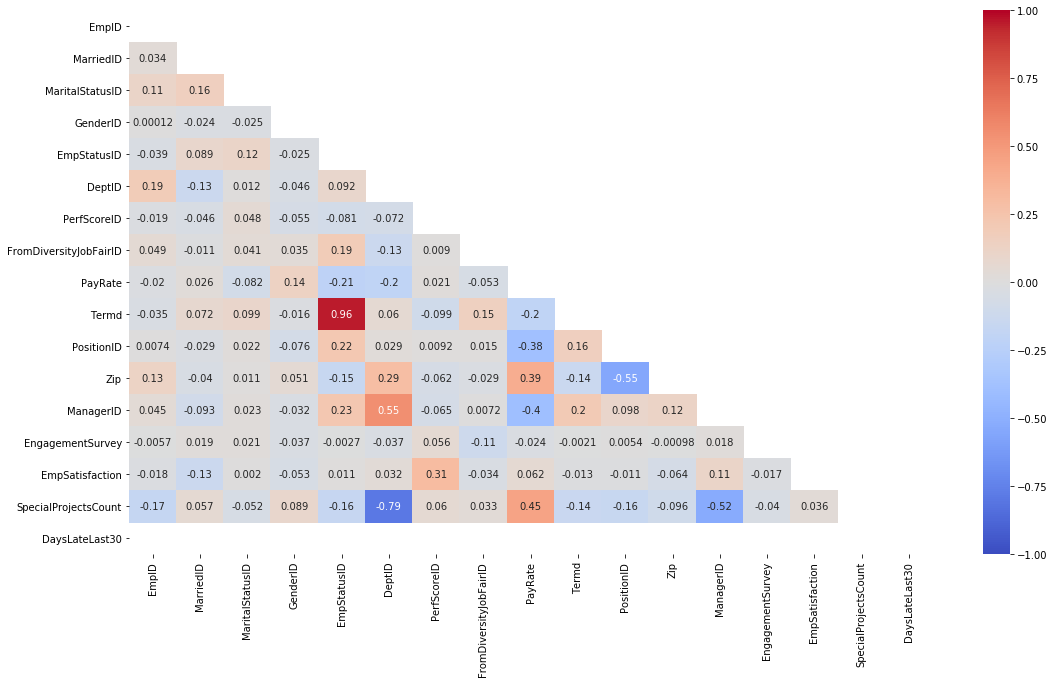

In [10]:
mask = np.triu(np.ones_like(hr_df.corr(), dtype=np.bool))
plt.figure(figsize=(18,10))
sns.heatmap(hr_df.corr(), mask=mask, cmap="coolwarm", annot=True, vmin=-1, vmax=1) 

plt.show()

## IBM HR

In [11]:
ibm_hr = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [12]:
ibm_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [13]:
ibm_hr.shape

(1470, 35)

In [14]:
ibm_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
ibm_hr.duplicated().sum()

0

In [16]:
ibm_hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [17]:
ibm_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


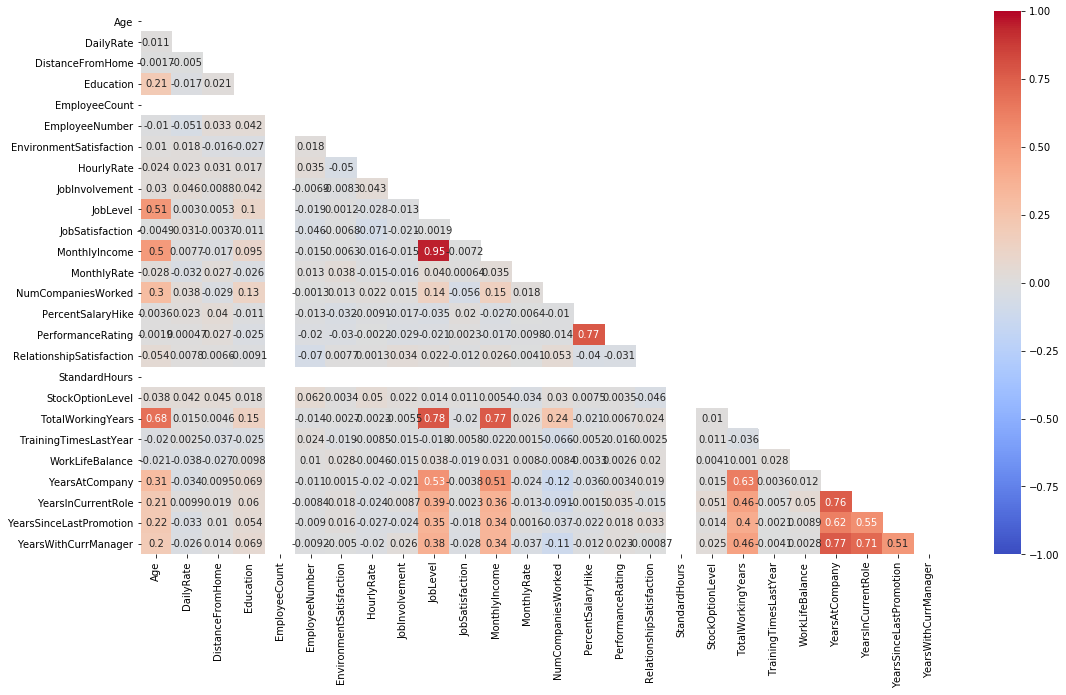

In [19]:
mask = np.triu(np.ones_like(ibm_hr.corr(), dtype=np.bool))
plt.figure(figsize=(18,10))
sns.heatmap(ibm_hr.corr(), mask=mask, cmap="coolwarm", annot=True, vmin=-1, vmax=1) 

plt.show()

## MBTI Dataset

In [20]:
mbti_df = pd.read_csv("mbti-type/mbti_1.csv")

In [21]:
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [22]:
mbti_df.shape

(8675, 2)

In [23]:
mbti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [24]:
mbti_df.duplicated().sum()

0

In [25]:
mbti_df.nunique()

type       16
posts    8675
dtype: int64

In [26]:
mbti_df.describe().T

,count,unique,top,freq
type,8675,16,INFP,1832
posts,8675,8675,'I wish I could stop. And I'm a smoker too|||O...,1
